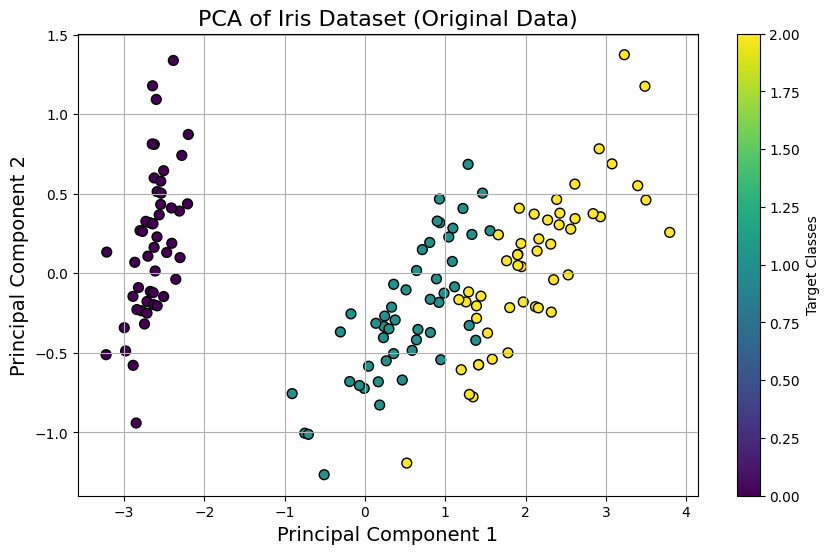

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("PCA of Iris Dataset (Original Data)", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.colorbar(label='Target Classes')
plt.grid(True)
plt.show()

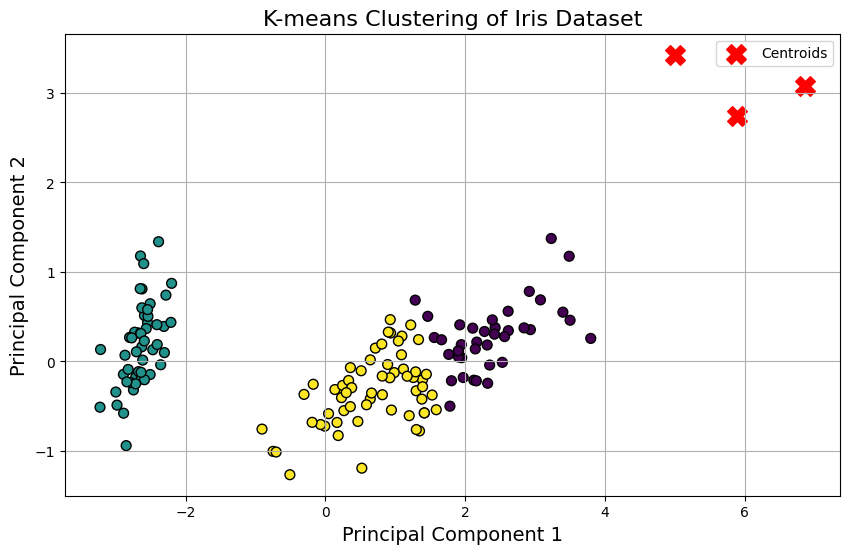

In [12]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot clusters and centroids
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label="Centroids")
plt.title("K-means Clustering of Iris Dataset", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

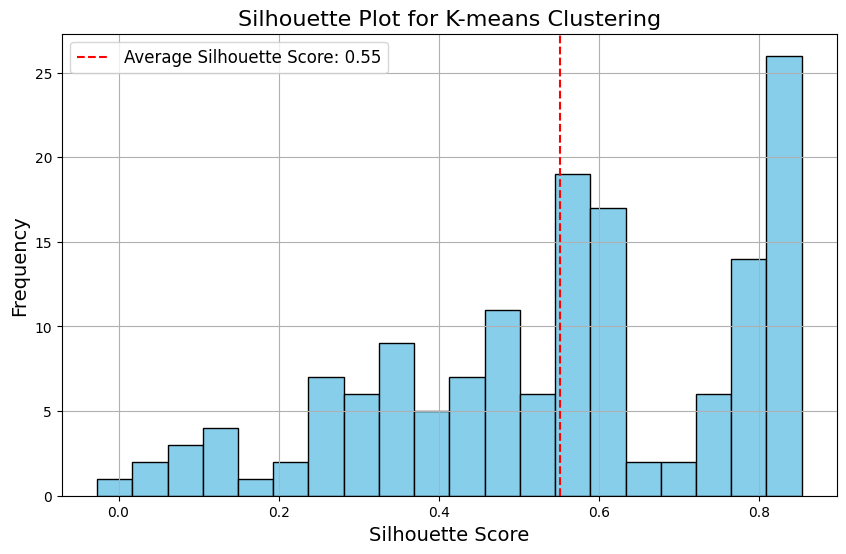

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Compute silhouette scores
silhouette_vals = silhouette_samples(X, y_kmeans)
avg_silhouette_score = silhouette_score(X, y_kmeans)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.hist(silhouette_vals, bins=20, edgecolor='black', color='skyblue')
plt.axvline(avg_silhouette_score, color='red', linestyle='--', label=f"Average Silhouette Score: {avg_silhouette_score:.2f}")
plt.title("Silhouette Plot for K-means Clustering", fontsize=16)
plt.xlabel("Silhouette Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Prepare data for interactive plot
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = y_kmeans

# 3D scatter plot using Plotly
fig = px.scatter_3d(df, x='PC1', y='PC2', z=y_kmeans, color='Cluster',
                    title="Interactive 3D Scatter Plot of K-means Clustering",
                    labels={'Cluster': 'Cluster Label'})
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris  # Example dataset (agriculture-like)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

In [3]:
# Load the dataset
data = load_iris()
X = data.data  # Features (e.g., plant measurements)
y = data.target  # Labels (e.g., species of plants)

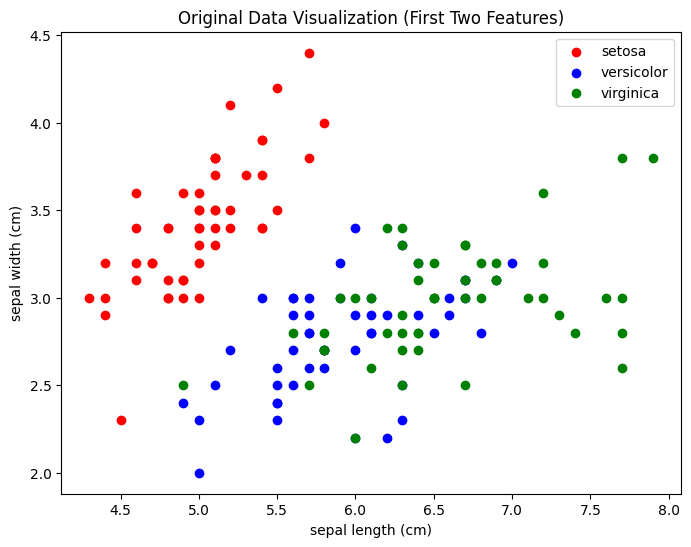

In [4]:
# Visualize the dataset before preprocessing
plt.figure(figsize=(8, 6))
for label, color in zip(range(3), ['red', 'blue', 'green']):
    plt.scatter(X[y == label, 0], X[y == label, 1], label=data.target_names[label], color=color)
plt.title("Original Data Visualization (First Two Features)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend()
plt.show()

In [5]:
# Preprocess the data
scaler = StandardScaler()  # Standardize features (important for KNN)
X_scaled = scaler.fit_transform(X)

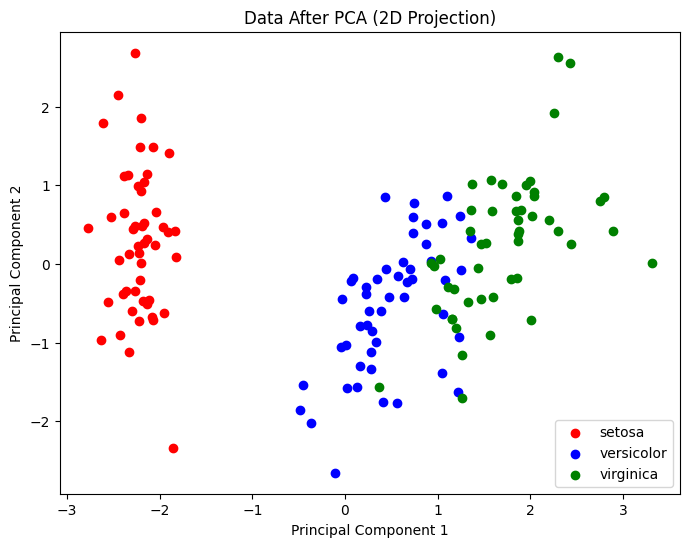

In [6]:
# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for label, color in zip(range(3), ['red', 'blue', 'green']):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=data.target_names[label], color=color)
plt.title("Data After PCA (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # Using 3 nearest neighbors
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
# Evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier: {accuracy:.2f}")

Accuracy of KNN classifier: 1.00


In [9]:
# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [10]:
# Create a mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [11]:
# Train KNN on PCA-reduced data
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_pca, y)

KNeighborsClassifier(n_neighbors=3)

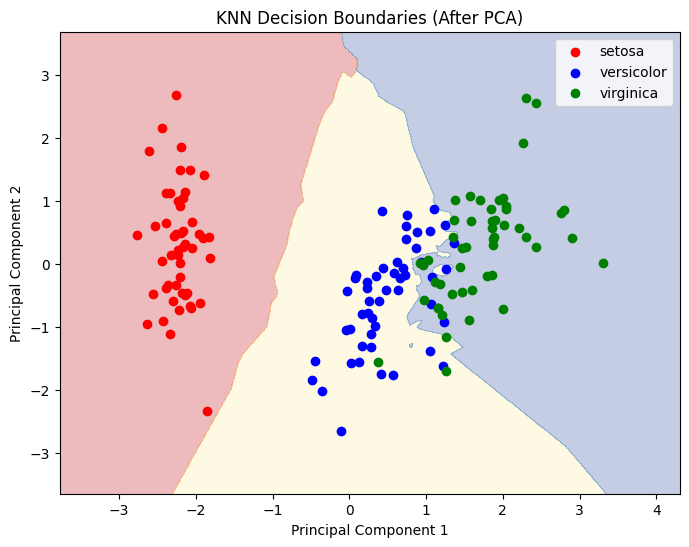

In [12]:
# Predict for each point in the mesh grid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
for label, color in zip(range(3), ['red', 'blue', 'green']):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=data.target_names[label], color=color)
plt.title("KNN Decision Boundaries (After PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()